[sklearn.cluster.KMeans example](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/kmean/kmean.ipynb)

[K-Means Clustering Concept](https://eunsukimme.github.io/ml/2019/12/16/K-Means)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from copy import deepcopy

import ImadDabbura.kmeans
from eunsukimme.kmeans import eunsukimme_kmeans

In [2]:
def charting(dx, dy, dc, cx, cy):
    print("cx:", cx)
    print("cy:", cy)
    plt.scatter(dx, dy, c=dc)    
    plt.scatter(cx, cy, c="red", alpha=0.5, marker="x")

In [3]:
def generate(dn, cn, l, h, r):
    p = "../data/input" + str(dn) + "-" + str(cn) + "." + str(l) + "-" + str(h) + ".csv"
    c = ["x", "y"]
    df = None
    if r:
        d = np.random.randint(l, h, size=(dn, 2))
        cx = np.random.uniform(min(d[:, 0]), max(d[:, 0]), cn)
        cy = np.random.uniform(min(d[:, 1]), max(d[:, 1]), cn)
        
        with open(p, "w") as f:
            print(cn, file=f)
            for i in range(cn):
                print(cx[i], cy[i], file=f)
            print(dn, file=f)
            f.close()

        df = pd.DataFrame(d, columns=c)
        df.to_csv(p, sep=" ", columns=c, mode="a", header=False, index=False)
    else:
        cx = np.zeros(cn)
        cy = np.zeros(cn)
        with open(p, "r") as f:
            cn = int(f.readline())
            for i in range(cn):
                l = f.readline().split()
                cx[i] = float(l[0])
                cy[i] = float(l[1])
            dn = int(f.readline())
            df = pd.read_csv(f, sep=" ", names=c)
    return df.values

In [4]:
data = generate(dn=100, cn=3, l=0, h=1000, r=False)
data_n = len(data)
data_x = data[:, 0]
data_y = data[:, 1]
data_c = np.zeros(data_n)
centroids_n = 3
centroids_x = np.zeros(centroids_n)
centroids_y = np.zeros(centroids_n)

# Implement

## STEP01: Place k random centroids

In [5]:
def init(dx, dy, cn):
    x = np.random.uniform(min(dx), max(dx), cn)
    y = np.random.uniform(min(dy), max(dy), cn)
    return x, y

init_x, init_y = init(data_x, data_y, centroids_n)
print(init_x)
print(init_y)

[628.82262364 120.35370811 128.20629582]
[ 79.95677244 899.31909356 897.69875545]


## STEP02: Assign datas to nearest centroids

In [6]:
def distance(x, y, u, v):
    return ((x - u)**2 + (y - v)**2)**0.5

In [7]:
def error(x0, y0, x1, y1):
    errors = np.zeros(len(x0))
    for i in range(len(errors)):
        errors[i] = distance(x0[i], y0[i], x1[i], y1[i])
    return errors.all() != 0

In [8]:
def evaluate(dx, dy, dc, cx, cy):
    dn = len(dx)
    cn = len(cx)
    a = np.zeros(cn)
    n = np.zeros(cn)
    for d in range(dn):
        c = int(dc[d])
        a[c] = a[c] + distance(dx[d], dy[d], cx[c], cy[c])
        n[c] += 1
        if 0 < n[c]:
            a[c] = a[c] / n[c]
    charting(dx, dy, dc, cx, cy)
    return a

In [9]:
def nearest(dx, dy, dc, cx, cy):
    cn = len(cx)
    for i in range(len(dx)):
        d = np.zeros(cn)
        for j in range(cn):
            d[j] = distance(dx[i], dy[i], cx[j], cy[j])
        dc[i] = np.argmin(d)

## STEP03: Update centroids

In [10]:
def means(dx, dy, dc, cn):
    dn = len(dx)
    mx = np.zeros(cn)
    my = np.zeros(cn)
    sx = np.zeros(dn)
    sy = np.zeros(dn)
    sn = np.zeros(dn)
    for i in range(dn):
        j = int(dc[i])
        sx[j] = sx[j] + dx[i]
        sy[j] = sy[j] + dy[i]
        sn[j] = sn[j] + 1
    for i in range(cn):
        if sn[i]:
            mx[i] = sx[i] / sn[i]
            my[i] = sy[i] / sn[i]
    return mx, my

      n: 11
cx: [410.57142857 188.41666667 777.34482759]
cy: [169.42857143 715.25       639.20689655]


array([ 9.86969835,  7.4735909 , 13.02951945])

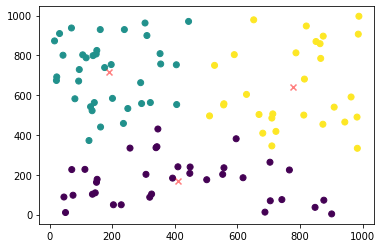

In [11]:
def cluster(dx, dy, dc, cx, cy):
    n = 0
    while True:
        nearest(dx, dy, dc, cx, cy)
        mx, my = means(dx, dy, dc, len(cx))
        if error(cx, cy, mx, my) is False:
            break
        cx = deepcopy(mx)
        cy = deepcopy(my)
        n = n + 1
        if 10 < n:
            break
    print("      n:", n)
    return cx, cy, dc
cx, cy, dc = cluster(data_x, data_y, data_c, init_x, init_y)
evaluate(data_x, data_y, dc, cx, cy)

cx: [410.57142857 188.41666667 777.34482759]
cy: [169.42857143 715.25       639.20689655]


array([ 9.86969835,  7.4735909 , 13.02951945])

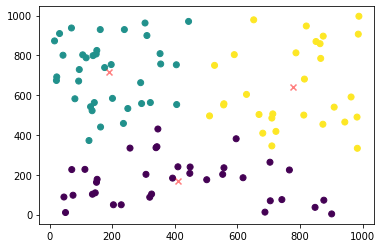

In [12]:
c, dc = eunsukimme_kmeans(data, centroids_n, init_x, init_y)
evaluate(data_x, data_y, dc, c[:, 0], c[:, 1])

# Reference using sklearn

cx: [190.2        777.34482759 402.66666667]
cy: [725.05714286 639.20689655 175.05555556]


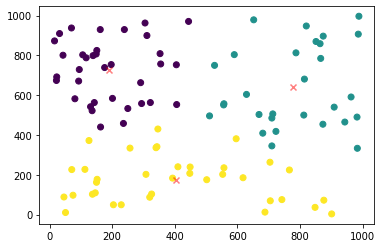

In [13]:
def sklean_kmeans(d, n):
    k = KMeans(n_clusters=n).fit(d)
    charting(d[:, 0], d[:, 1], k.labels_, k.cluster_centers_[:, 0], k.cluster_centers_[:, 1])

sklean_kmeans(data, centroids_n)

# Reference using  ImadDabbura.kmeans
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

cx: [190.2        777.34482759 402.66666667]
cy: [725.05714286 639.20689655 175.05555556]


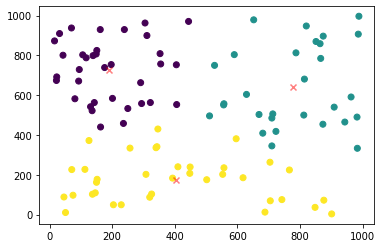

In [14]:
def ImadDabburaKmeans(d, n):
    km = ImadDabbura.kmeans.Kmeans(n_clusters=n)
    km.fit(d)
    charting(d[:, 0], d[:, 1], km.labels, km.centroids[:, 0], km.centroids[:, 1])
    
ImadDabburaKmeans(data, centroids_n)